In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df= pd.read_csv('NewHR.csv')

In [3]:
df.head()

,is_promoted,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,2092,Operations,region_7,Bachelor's,m,other,1,42,4,11,0,0,58
1,0,12576,Sales & Marketing,region_22,Bachelor's,f,sourcing,1,37,5,8,0,0,50
2,1,74716,Technology,region_31,Bachelor's,m,other,1,36,5,2,1,0,82
3,0,6383,Sales & Marketing,region_30,Bachelor's,m,sourcing,2,27,3,4,0,0,50
4,0,34886,Technology,region_2,Below Secondary,f,referred,1,22,3,2,0,0,80


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_promoted,38918.0,0.086978,0.281806,0.0,0.00,0.0,0.00,1.0
employee_id,38918.0,39183.115859,22661.286081,1.0,19523.25,39241.0,58789.75,78298.0
no_of_trainings,38918.0,1.250655,0.602559,1.0,1.00,1.0,1.00,10.0
age,38918.0,35.584100,7.536824,20.0,30.00,34.0,39.00,60.0
previous_year_rating,38918.0,3.340742,1.255872,1.0,3.00,3.0,4.00,5.0
length_of_service,38918.0,6.308572,4.202567,1.0,3.00,5.0,8.00,37.0
KPIs_met >80%,38918.0,0.358138,0.479459,0.0,0.00,0.0,1.00,1.0
awards_won?,38918.0,0.023639,0.151925,0.0,0.00,0.0,0.00,1.0
avg_training_score,38918.0,63.614677,13.259943,39.0,52.00,60.0,76.00,99.0


In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38918 entries, 0 to 38917
Data columns (total 14 columns):
is_promoted             38918 non-null int64
employee_id             38918 non-null int64
department              38918 non-null object
region                  38918 non-null object
education               38918 non-null object
gender                  38918 non-null object
recruitment_channel     38918 non-null object
no_of_trainings         38918 non-null int64
age                     38918 non-null int64
previous_year_rating    38918 non-null int64
length_of_service       38918 non-null int64
KPIs_met >80%           38918 non-null int64
awards_won?             38918 non-null int64
avg_training_score      38918 non-null int64
dtypes: int64(9), object(5)
memory usage: 4.2+ MB


In [7]:
promotion_count = df['is_promoted'].value_counts()
promotion_count

0    35533
1     3385
Name: is_promoted, dtype: int64

In [8]:
promoted_df = df[df['is_promoted'] == 1]
not_promoted_df = df[df['is_promoted']==0]

In [9]:
print('shape of promoted_df', promoted_df.shape)
print('shape of not promoted_df', not_promoted_df.shape)

shape of promoted_df (3385, 14)
shape of not promoted_df (35533, 14)


In [10]:
df['department'].value_counts()

Sales & Marketing    11349
Operations            8446
Procurement           5319
Technology            5237
Analytics             3640
Finance               1804
HR                    1713
R&D                    724
Legal                  686
Name: department, dtype: int64

In [11]:
promoted_df['department'].value_counts()

Sales & Marketing    837
Operations           773
Technology           576
Procurement          520
Analytics            346
Finance              156
HR                    98
R&D                   48
Legal                 31
Name: department, dtype: int64

In [12]:
(promoted_df['department'].value_counts() / df['department'].value_counts())*100

Analytics             9.505495
Finance               8.647450
HR                    5.720957
Legal                 4.518950
Operations            9.152261
Procurement           9.776274
R&D                   6.629834
Sales & Marketing     7.375099
Technology           10.998663
Name: department, dtype: float64

In [13]:
import scipy.stats as stats

In [14]:
dataset_table=pd.crosstab(df['KPIs_met >80%'],df['is_promoted'])
dataset_table.values
Observed_Values = dataset_table.values
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("Reject H0,There is a relationship between KPIs met and promotion")
else:
    print("Retain H0,There is no relationship between KPIs met and promotion") 

Reject H0,There is a relationship between KPIs met and promotion


In [15]:
dataset_table=pd.crosstab(df['awards_won?'],df['is_promoted'])
dataset_table.values
Observed_Values = dataset_table.values
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("Reject H0,There is a relationship between awards won and promotion")
else:
    print("Retain H0,There is no relationship between awards won and promotion") 

Reject H0,There is a relationship between awards won and promotion


In [16]:
dataset_table=pd.crosstab(df['previous_year_rating'],df['is_promoted'])
dataset_table.values
Observed_Values = dataset_table.values
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[:,0])
no_of_columns=len(dataset_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("Reject H0,There is a relationship between previous_year_rating and promotion")
else:
    print("Retain H0,There is no relationship between previous_year_rating and promotion") 

Reject H0,There is a relationship between previous_year_rating and promotion


In [17]:
dataset_table=pd.crosstab(df['length_of_service'],df['is_promoted'])
dataset_table.values
Observed_Values = dataset_table.values
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[:,0])
no_of_columns=len(dataset_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("Reject H0,There is a relationship between length_of_service and promotion")
else:
    print("Retain H0,There is no relationship between length_of_service and promotion")

Retain H0,There is no relationship between length_of_service and promotion


In [18]:
dataset_table=pd.crosstab(df['age'],df['is_promoted'])
dataset_table.values
Observed_Values = dataset_table.values
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[:,0])
no_of_columns=len(dataset_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("Reject H0,There is a relationship between age and promotion")
else:
    print("Retain H0,There is no relationship between age and promotion")

Reject H0,There is a relationship between age and promotion


In [19]:
dataset_table=pd.crosstab(df['no_of_trainings'],df['is_promoted'])
dataset_table.values
Observed_Values = dataset_table.values
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[:,0])
no_of_columns=len(dataset_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("Reject H0,There is a relationship between no_of_trainings and promotion")
else:
    print("Retain H0,There is no relationship between no_of_trainings and promotion")

Reject H0,There is a relationship between no_of_trainings and promotion


In [20]:
dataset_table=pd.crosstab(df['avg_training_score'],df['is_promoted'])
dataset_table.values
Observed_Values = dataset_table.values
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[:,0])
no_of_columns=len(dataset_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("Reject H0,There is a relationship between avg_training_score and promotion")
else:
    print("Retain H0,There is no relationship between avg_training_score and promotion")

Reject H0,There is a relationship between avg_training_score and promotion


In [21]:
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [22]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [23]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [24]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [25]:
df.head()

,is_promoted,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,2092,Operations,region_7,Bachelor's,m,other,1,42,4,11,0,0,58
1,0,12576,Sales & Marketing,region_22,Bachelor's,f,sourcing,1,37,5,8,0,0,50
2,1,74716,Technology,region_31,Bachelor's,m,other,1,36,5,2,1,0,82
3,0,6383,Sales & Marketing,region_30,Bachelor's,m,sourcing,2,27,3,4,0,0,50
4,0,34886,Technology,region_2,Below Secondary,f,referred,1,22,3,2,0,0,80


In [26]:
df= df.drop(['department','region','employee_id'], axis=1)

In [27]:
df.head()

,is_promoted,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,Bachelor's,m,other,1,42,4,11,0,0,58
1,0,Bachelor's,f,sourcing,1,37,5,8,0,0,50
2,1,Bachelor's,m,other,1,36,5,2,1,0,82
3,0,Bachelor's,m,sourcing,2,27,3,4,0,0,50
4,0,Below Secondary,f,referred,1,22,3,2,0,0,80


In [28]:
df =pd.get_dummies(df,['education','gender','recruitment_channel'], drop_first= True)

In [29]:
df.head()

,is_promoted,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,1,42,4,11,0,0,58,0,0,1,0,0
1,0,1,37,5,8,0,0,50,0,0,0,0,1
2,1,1,36,5,2,1,0,82,0,0,1,0,0
3,0,2,27,3,4,0,0,50,0,0,1,0,1
4,0,1,22,3,2,0,0,80,1,0,0,1,0


In [30]:
X = df.drop(['is_promoted'], axis='columns')
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,42,4,11,0,0,58,0,0,1,0,0
1,1,37,5,8,0,0,50,0,0,0,0,1
2,1,36,5,2,1,0,82,0,0,1,0,0
3,2,27,3,4,0,0,50,0,0,1,0,1
4,1,22,3,2,0,0,80,1,0,0,1,0


In [31]:
target = 'is_promoted'
Y = df.loc[:, df.columns==target]
Y.head()

,is_promoted
0,0
1,0
2,1
3,0
4,0


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Balancing Class

In [33]:
unique_classes = list(df[target].unique())
unique_classes

[0, 1]

In [34]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])
                                     *len(unique_classes))

In [35]:
out_dict

{0: 0.5476317789097459, 1: 5.748596750369276}

In [36]:
print (X_train.shape, Y_train.shape)

(26075, 12) (26075, 1)


### Trying With Random Forest Classifier

#### Using class_weight='balanced'

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
clf = RandomForestClassifier(class_weight='balanced').fit(X_train, Y_train)

In [78]:
from sklearn.utils import class_weight

In [79]:
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([0.54740312, 5.77391497])

In [80]:
Y_Test_Pred = clf.predict(X_test)

In [81]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,11549,915
1,167,212


In [82]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9157517713929767
Precision =  0.5593667546174143
Recall =  0.1881100266193434
F1 Score =  0.2815405046480744


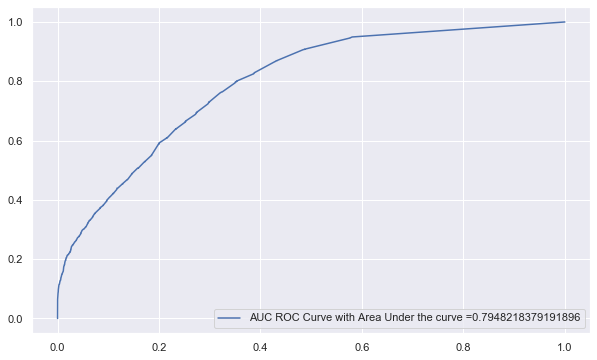

In [83]:
generate_auc_roc_curve(clf, X_test)

### Using parameters to get a better results  

In [108]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [109]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights],
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap
    },
    scoring='f1',
    cv=5,verbose=2, n_jobs = 4
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Fitting 5 folds for each of 6400 candidates, totalling 32000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   40.2s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 18.5min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 22.5min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 26.7min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 31.5min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 36.8min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 42.6min

Best parameters : {'bootstrap': False, 'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}


In [111]:
clf = RandomForestClassifier(**grid_result.best_params_).fit(X_train, Y_train)

In [112]:
Y_Test_Pred = clf.predict(X_test)

In [113]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,11124,796
1,592,331


In [114]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.891925562563264
Precision =  0.35861321776814736
Recall =  0.2937000887311446
F1 Score =  0.3229268292682927


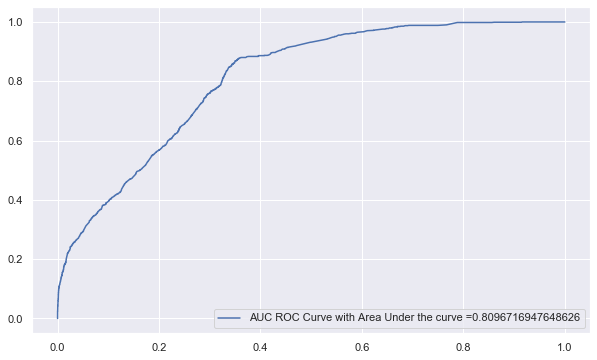

In [115]:
generate_auc_roc_curve(clf, X_test)

# SMOTE

In [116]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 23817, 1: 2258}

In [117]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [118]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 23817, 1: 23817}

In [95]:
clf = RandomForestClassifier().fit(x_train_res, y_train_res)

In [119]:
Y_Test_Pred = clf.predict(X_test)

In [120]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,11124,796
1,592,331


In [121]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.891925562563264
Precision =  0.35861321776814736
Recall =  0.2937000887311446
F1 Score =  0.3229268292682927


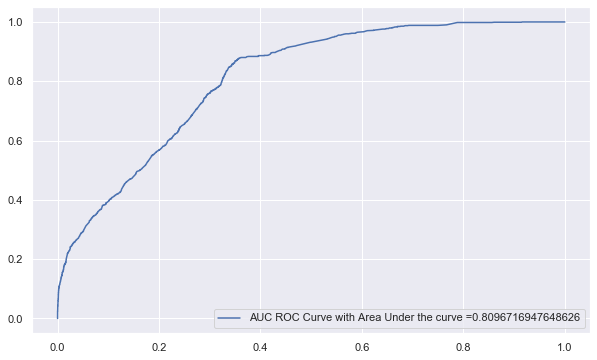

In [122]:
generate_auc_roc_curve(clf, X_test)

In [100]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

Best parameters : {'smote__sampling_strategy': 0.19555555555555554}


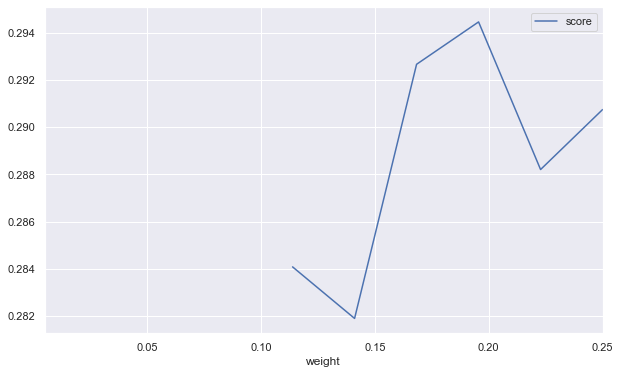

In [101]:
pipe = make_pipeline(
    SMOTE(),
    RandomForestClassifier()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [104]:
pipe = make_pipeline(
    SMOTE(sampling_strategy=0.195),
    RandomForestClassifier()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [105]:
pd.crosstab(Y_Test_Pred, Y_test[target], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,11295,863
1,421,264


In [106]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9000233590282645
Precision =  0.3854014598540146
Recall =  0.23425022182786157
F1 Score =  0.2913907284768212


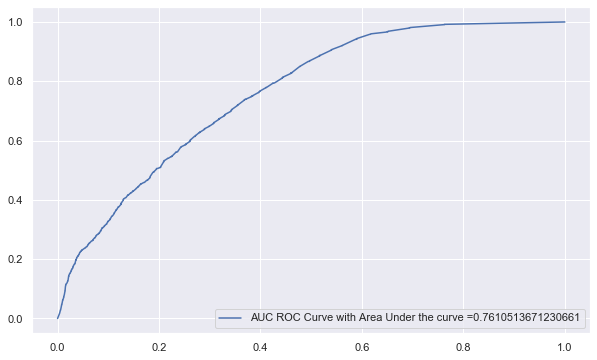

In [107]:
generate_auc_roc_curve(clf, X_test)

cut off value 
(trial and error method)

LOgestic 